# ECON 323 Project


#### The primary goal of this analysis is to find the factors that impact transmission rate of COVID-19. To be precise, the question we are trying to answer is:

### What role does temperature and relative humidity play in the transmission of COVID-19 ?

### Background

Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty in breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. 

##### HOW IT SPREADS

Coronavirus disease spreads primarily through contact with an infected person when they cough or sneeze. It also spreads when a person touches a surface or object that has the virus on it, then touches their eyes, nose, or mouth.

### Dataset

Our aim is to test this claim with the current data that dates from 22 January, 2020 to 22 April, 2020. We selected this specific timeline for two reasons: 

Firstly, our study focuses on the 8 countries that have been affected the most by the virus (we define "most affected" by the "most number of confirmed cases"). Based on the John Hopkins dataset, which was last updated on April 22, the countries with the most confirmed cases include: USA, Spain, Italy, France, Germany, United Kingdom, Turkey, China.
We selected the first data to be January 22, 2020 since that is the date when the first case of the virus was confirmed in the USA. 

Secondly, due to temperature and humitdity data constraints, 22 April 2020 was the last date for which we could collect data on all the countries. 

NOTE: We use "confirmed cases" instead of "number of deaths" to represent the most affected countries because almost all the countries have used different strategies to tackle the spread of the virus. While some countries, such as India and Iran have issue a national lockdown, Japan and South Korea have only issued national "recommendations" regarding social distancing. Furthermore, all the countries may also vary in terms of the population and literacy rate which might play a key role in the amount of interaction the people are exposed to. Number of deaths may be the outcome of the severity of the lockdown or the population or some other factor, therefore, not being the best indicator of the spread of the virus due to temperature-related conditions. 



### Methodology

1) General visualizations to show the spread of the virus across the world (including confirmed cases, death and recoveries by country)

2) Visualization of the trend between in the number of cases for each country over the selected time peiod (for the 8 countries with highest number of confirmed cases)- Formulate Hypothesis based on these visualizations

3) Presentation of estimation results from 2 different regression specifications: Ordinary Least Squares Regression and Random Forests Regression 

4) Discussion of the limitations of our study and areas for further research. 



https://www.bbc.com/future/article/20200323-coronavirus-will-hot-weather-kill-covid-19

https://www.bbc.com/news/world-52103747


![alt text](image/covid19_map.png "Title")

In [114]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

## Datasets

### Display Lastest counts for all Countries

In [115]:
# Load all datasets
confirmed_orig = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
confirmed_orig.head(10)

Province/State       Country/Region      Lat      Long  \
0                           NaN          Afghanistan  33.0000   65.0000   
1                           NaN              Albania  41.1533   20.1683   
2                           NaN              Algeria  28.0339    1.6596   
3                           NaN              Andorra  42.5063    1.5218   
4                           NaN               Angola -11.2027   17.8739   
5                           NaN  Antigua and Barbuda  17.0608  -61.7964   
6                           NaN            Argentina -38.4161  -63.6167   
7                           NaN              Armenia  40.0691   45.0382   
8  Australian Capital Territory            Australia -35.4735  149.0124   
9               New South Wales            Australia -33.8688  151.2093   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/17/20  \
0        0        0        0        0        0        0  ...      906   
1        0        0        0        0        0        0  ...      539   
2        0        0        0        0        0        0  ...     2418   
3        0        0        0        0        0        0  ...      696   
4        0        0        0        0        0        0  ...       19   
5        0        0        0        0        0        0  ...       23   
6        0        0        0        0        0        0  ...     2669   
7        0        0        0        0        0        0  ...     1201   
8        0        0        0        0        0        0  ...      103   
9        0        0        0        0        3        4  ...     2926   

   4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
0      933      996     1026     1092     1176     1279     1351     1463   
1      548      562      584      609      634      663      678      712   
2     2534     2629     2718     2811     2910     3007     3127     3256   
3      704      713      717      717      723      723      731      738   
4       24       24       24       24       25       25       25       25   
5       23       23       23       23       24       24       24       24   
6     2758     2839     2941     3031     3144     3435     3607     3780   
7     1248     1291     1339     1401     1473     1523     1596     1677   
8      103      103      104      104      104      104      105      106   
9     2936     2957     2963     2969     2971     2976     2982     2994   

   4/26/20  
0     1531  
1      726  
2     3382  
3      738  
4       26  
5       24  
6     3892  
7     1746  
8      106  
9     3002  

[10 rows x 100 columns]

In [116]:
# melt datasets to get dates into 1 column
ids = ["Province/State","Country/Region", "Lat","Long"]
confirmed=confirmed_orig.melt(id_vars=ids, var_name="Date", value_name="cases")
deaths=deaths.melt(id_vars=ids,var_name="Date", value_name="deaths")
recoveries=recoveries.melt(id_vars=ids,var_name="Date", value_name="recoveries")


In [117]:
# get latest data 
max_date = recoveries.iloc[[-1]]["Date"].iloc[0]

latest_data_recoveries = recoveries.loc[recoveries['Date'] == max_date]
latest_data_confirmed = confirmed.loc[confirmed['Date'] == max_date]
latest_data_deaths = deaths.loc[deaths['Date'] == max_date]

latest_data_confirmed.loc[latest_data_confirmed['Country/Region'] == "Canada"]
latest_data_confirmed_countries = latest_data_confirmed.groupby('Country/Region').agg('sum')
latest_data_deaths_countries = latest_data_deaths.groupby('Country/Region').agg('sum')
latest_data_recoveries = latest_data_recoveries.drop(columns=['Province/State', 'Date']).groupby('Country/Region').agg('sum')

latest_data_recoveries.head(10)


Lat       Long  recoveries
Country/Region                                      
Afghanistan           33.0000    65.0000         207
Albania               41.1533    20.1683         410
Algeria               28.0339     1.6596        1508
Andorra               42.5063     1.5218         344
Angola               -11.2027    17.8739           6
Antigua and Barbuda   17.0608   -61.7964          11
Argentina            -38.4161   -63.6167        1107
Armenia               40.0691    45.0382         833
Australia           -255.9695  1129.8623        5541
Austria               47.5162    14.5501       12282

### Country wise total defined cases 

In [118]:
import warnings
warnings.filterwarnings('ignore')

covid = latest_data_confirmed_countries.join(latest_data_deaths_countries["deaths"]).join(latest_data_recoveries["recoveries"]);
covid = covid.rename(columns={"cases": "Confirmed", "deaths": "Deaths", "recoveries": "Recovered"});
latest_data_complete = covid[["Confirmed", "Deaths","Recovered" ]];
latest_data_complete['Active'] = latest_data_complete['Confirmed'] - latest_data_complete['Deaths'] - latest_data_complete['Recovered'];
latest_data_complete.sort_values(by="Confirmed", ascending=False).head(10)

Confirmed  Deaths  Recovered  Active
Country/Region                                      
US                 965785   54881     106988  803916
Spain              226629   23190     117727   85712
Italy              197675   26644      64928  106103
France             162220   22890      45681   93649
Germany            157770    5976     112000   39794
United Kingdom     154037   20794        778  132465
Turkey             110130    2805      29140   78185
Iran                90481    5710      69657   15114
China               83912    4637      78277     998
Russia              80949     747       6767   73435

Text(0.5, 1.0, 'Top 10 countries with the Highest number of confirmed cases')

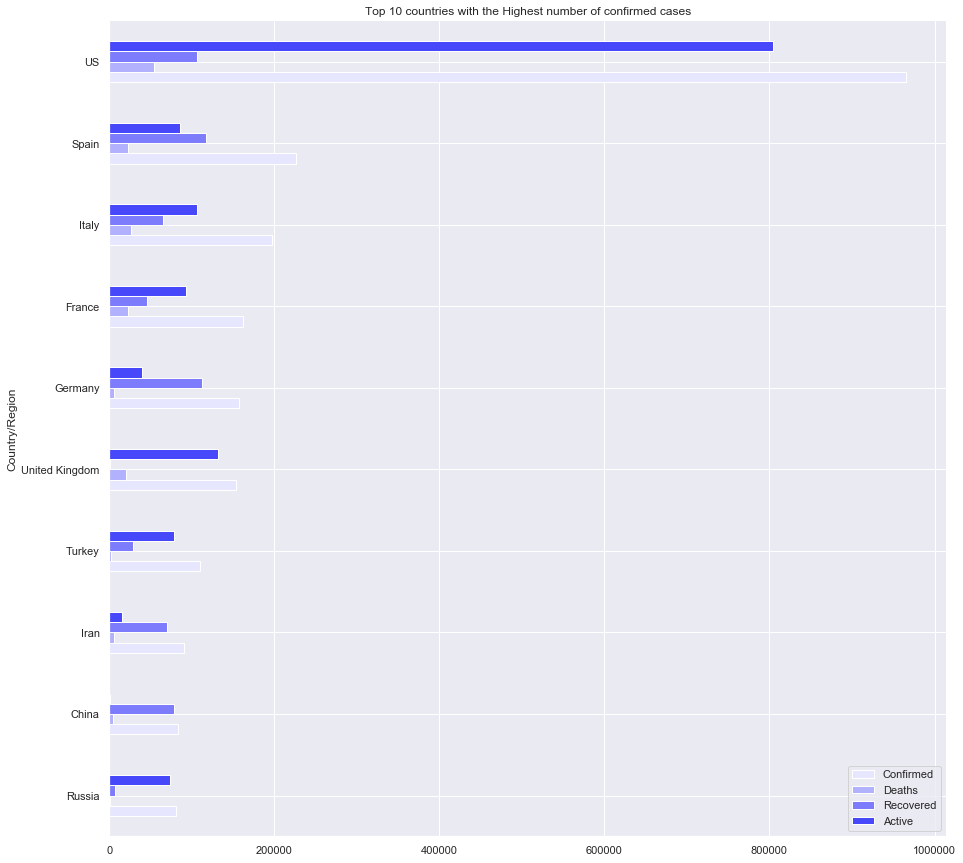

In [119]:
# latest_data_complete[:15].plot.bar()
colors = [
    (0.902, 0.902, 0.997), (0.695, 0.695, 0.993), (0.488, 0.488, 0.989),
    (0.282, 0.282, 0.985), (0.078, 0.078, 0.980)
]
fig, ax = plt.subplots(figsize=(15,15))

latest_data_complete.sort_values(by="Confirmed", ascending=True).tail(10).plot(kind="barh", ax=ax, color=colors)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Top 10 countries with the Highest number of confirmed cases")

## Data Visualizations

#### Load Dataset created with above modifications

In [122]:
complete_time_series = pd.read_csv('data/covid_19_clean_complete.csv', parse_dates=['Date'])
complete_time_series.tail(5)

Province/State         Country/Region        Lat       Long  \
21479  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
21480                        NaN            South Sudan   6.877000  31.307000   
21481                        NaN         Western Sahara  24.215500 -12.885800   
21482                        NaN  Sao Tome and Principe   0.186360   6.613081   
21483                        NaN                  Yemen  15.552727  48.516388   

            Date  Confirmed  Deaths  Recovered  
21479 2020-04-12          1       0          0  
21480 2020-04-12          4       0          0  
21481 2020-04-12          6       0          0  
21482 2020-04-12          4       0          0  
21483 2020-04-12          1       0          0

In [123]:
# Preparing Data for visualizations

# Defining COVID-19 cases as per classifications 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Defining Active Case: Active Case = confirmed - deaths - recovered
complete_time_series['Active'] = complete_time_series['Confirmed'] - complete_time_series['Deaths'] - complete_time_series['Recovered']

# Renaming Mainland china as China in the data table
complete_time_series['Country/Region'] = complete_time_series['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
complete_time_series[['Province/State']] = complete_time_series[['Province/State']].fillna('')
complete_time_series[cases] = complete_time_series[cases].fillna(0)


In [124]:
complete_time_series[complete_time_series["Country/Region"] == "US"]

Province/State Country/Region      Lat     Long       Date  Confirmed  \
225                              US  37.0902 -95.7129 2020-01-22          1   
487                              US  37.0902 -95.7129 2020-01-23          1   
749                              US  37.0902 -95.7129 2020-01-24          2   
1011                             US  37.0902 -95.7129 2020-01-25          2   
1273                             US  37.0902 -95.7129 2020-01-26          5   
...              ...            ...      ...      ...        ...        ...   
20399                            US  37.0902 -95.7129 2020-04-08     429052   
20661                            US  37.0902 -95.7129 2020-04-09     461437   
20923                            US  37.0902 -95.7129 2020-04-10     496535   
21185                            US  37.0902 -95.7129 2020-04-11     526396   
21447                            US  37.0902 -95.7129 2020-04-12     555313   

       Deaths  Recovered  Active  
225         0          0       1  
487         0          0       1  
749         0          0       2  
1011        0          0       2  
1273        0          0       5  
...       ...        ...     ...  
20399   14695      23559  390798  
20661   16478      25410  419549  
20923   18586      28790  449159  
21185   20463      31270  474663  
21447   22020      32988  500305  

[82 rows x 9 columns]

In [126]:
complete_time_series["ln(confirmed)"] = np.log1p(complete_time_series["Confirmed"] )
px.line(complete_time_series.sort_values(by="Confirmed", ascending=False), x='Date', y='Confirmed', color='Country/Region',title='COVID19 Total Confrimed Cases growth for top 10 worst affected countries');

In [127]:
px.line(complete_time_series, x='Date', y='Deaths', color='Country/Region', title='COVID19 Total Deaths growth for top 10 worst affected countries')

 ***A Time-series graph of the confirmed and recovered cases of COVID-19***

In [128]:
import plotly as py
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)   

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=complete_time_series.Date,
                y=complete_time_series['Confirmed'],
                name="Confirmed",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=complete_time_series.Date,
                y=complete_time_series['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.6))
fig.update_layout(title_text='Progression of cases since the beginning',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

1. Confirmed cases increasing exponentially between 1st week to 3rd week of Feb
1. Recovered cases increasing exponentially from 4th week of March
1. Growth rate of confirmed cases significantly drops from March 1st week

***Interactive globe showing the growth of the pandemic with respect to confirmed cases of COVID19***

In [129]:
latest_data = latest_data_complete.reset_index()

In [130]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Calculating the count of confirmed cases by country

countries = np.unique(latest_data['Country/Region'])
confirmed_mean = []
for country in countries:
    confirmed_mean.append(latest_data[latest_data['Country/Region'] == country]['Confirmed'].sum())
    
# Building the dataframe

    data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = confirmed_mean,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Count')
            )
       ]
    
# Building the visual

    layout = dict(
    title = 'COVID-19 Confirmed Cases',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Interactive Globe displaying the average land temperatures of the planet**

In [131]:
temp_country = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")

In [132]:
# temp_country[temp_country["Country"] == "Spain"]

py.init_notebook_mode(connected=True)

## Removing the duplicates

temp_country_clear = temp_country[~temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

temp_country_clear = temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Calculating average temperature by country

countries = np.unique(temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(temp_country_clear[temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

# Building the data frame
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

# Building the visual

layout = dict(
    title = 'GLOBAL AVERAGE LAND TEMPERATURES',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

**Display of progression of spread of COVID19 across the World**

In [159]:
# import plotly.express as px
# import plotly.offline as py
py.init_notebook_mode(connected=True)
complete_time_series_globe = complete_time_series.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
complete_time_series_globe = complete_time_series_globe.reset_index()
complete_time_series_globe['Date'] = pd.to_datetime(complete_time_series_globe['Date'])
complete_time_series_globe['Date'] = complete_time_series_globe['Date'].dt.strftime('%m/%d/%Y')
complete_time_series_globe['size'] = complete_time_series_globe['Confirmed'].pow(0.2)

fig = px.scatter_geo(complete_time_series_globe, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(complete_time_series_globe['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Progression of spread of COVID-19')
fig.update(layout_coloraxis_showscale=False)
py.offline.iplot(fig)

The spread is much more than in the temperate zone of the planet compared to tropical zones. 
Moreover,  drier parts of the world has lesser transmission. 
You , can play this multiple times to get a deeper understanding

### Analysis

According to AccuWeather, these are some of the general findings regarding the spread of viruses and it's relationship to average temperature

1. Temperature plays an important role in the transmission of the virus. 
1. The virus would not be be able to survive for long in warmer climates or surroundings
1. There is a higher rate of transmission in the temperate zone of the planet, where the average temp is about 5-10 degrees Celsius 
1. However, there is a relatively low transmission rate in the tropical zone, where the avg. temp is about 25 degrees celsius or higher.

 
  
  
- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3551767


We aim to test these general findings by focusing our study on the most affected regions in the world.

### Key Assumption:
We acknowledge that our findings would be inaccurate if we use a national average for temperature and humidity (for all the countries we are going to examine) since some of the countries (such as USA and China) are spread out over a huge land mass and different parts of the country experience quite varied average temperatures. In order to deal with this issue, we only look at the specific area in each country which has been affected the most. 

In USA, we only look at New York and in China, we only take into account Hubei. These two provinces/states have the highest (and the majority proportion) of confirmed cases in the country. Firstly, for USA, New York has more confirmed cases than all the other countries (New York has 258,222 number of cases, while Spain, which has the second highest number of cases has 208,839 confirmed cases). As for Hubei, it has 68,128 confirmed cases (being the 8th in order still behind Turkey, which has 98,674 cases). Thus these "regions" still follow the same order and their number of confirmed cases are amongst the top 8 across the world.


NOTE: The ranking is based on the number of confirmed cases as of 22 April, 2020. 

# Data collection for individual Regions of high impact

###  New York

In [137]:
# New york data - Explain why New York #TODO
confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

# Drop unwanted Columns
confirmed_US = confirmed_US.drop(columns=["UID", "iso2", "iso3", "code3", "FIPS", "Admin2", "Lat", "Long_","Combined_Key", "Country_Region" ])
confirmed_US

# Get names of indexes for which Province_state is not New York
indexNames = confirmed_US[ confirmed_US['Province_State'] != "New York" ].index
 
# Delete these row indexes from dataFrame
confirmed_US.drop(indexNames , inplace=True)
confirmed_US

# aggregate different counties into one row
new_york = confirmed_US.groupby('Province_State').agg('sum')
new_york

new_york= new_york.reset_index()
# Melt date into one column
new_york = new_york.melt(id_vars="Province_State", var_name="Date", value_name="cases")
new_york = new_york.rename(columns={"Province_State": "Region"})

new_york.head(8)



Region     Date  cases
0  New York  1/22/20      0
1  New York  1/23/20      0
2  New York  1/24/20      0
3  New York  1/25/20      0
4  New York  1/26/20      0
5  New York  1/27/20      0
6  New York  1/28/20      0
7  New York  1/29/20      0

### CHINA (Hubei)

In [138]:
china = confirmed[confirmed["Country/Region"] == "China"]
hubei = china[china["Province/State"] == "Hubei"]
# confirmed
hubei = hubei.drop(columns=["Country/Region", "Lat", "Long"])
hubei = hubei.rename(columns={"Province/State": "Region"})

hubei.tail(8)

Region     Date  cases
23294  Hubei  4/19/20  68128
23558  Hubei  4/20/20  68128
23822  Hubei  4/21/20  68128
24086  Hubei  4/22/20  68128
24350  Hubei  4/23/20  68128
24614  Hubei  4/24/20  68128
24878  Hubei  4/25/20  68128
25142  Hubei  4/26/20  68128

## Others 

### Spain, Italy, France, Germany, Turkey, United Kingdom



In [139]:
regions = ["Spain", "Italy", "France", "Germany", "Turkey", "United Kingdom"]
Others = confirmed_orig[confirmed_orig['Country/Region'].isin(regions)]

# remove provincial data and keep country data
Others = Others[Others['Province/State'].isna()]
Others = Others.drop(columns=["Province/State", "Lat", "Long"]).rename(columns={"Country/Region": "Region"})
Others = Others.melt(id_vars="Region", var_name="Date", value_name="cases")

Others.head(8)



Region     Date  cases
0          France  1/22/20      0
1         Germany  1/22/20      0
2           Italy  1/22/20      0
3           Spain  1/22/20      0
4          Turkey  1/22/20      0
5  United Kingdom  1/22/20      0
6          France  1/23/20      0
7         Germany  1/23/20      0

## Combine all datasets (Region, Dates, Cases)

In [140]:
frames = [new_york, hubei, Others]

all_regions = pd.concat(frames)
regions += ["Hubei", "New York"]
# Change Date type to Date Object
all_regions['Date'] = pd.to_datetime(all_regions['Date'])
all_regions['Date'] = all_regions['Date'].dt.strftime('%m/%d/%Y')
all_regions = all_regions.sort_values(by=[ "Date"], ascending=True)
all_regions.head(8)

Region        Date  cases
0         New York  01/22/2020      0
0           France  01/22/2020      0
1          Germany  01/22/2020      0
2            Italy  01/22/2020      0
3            Spain  01/22/2020      0
4           Turkey  01/22/2020      0
5   United Kingdom  01/22/2020      0
62           Hubei  01/22/2020    444

### Get Temperature Humidity data

Temperature and Humidity data was scraped from World Weather Online API using a Python Script as shown below.

In [1]:
# Temperature_Humidity_data/WWO.py

# import requests
# import csv

# regions = ["Hubei", "Spain", "Italy", "France",
#            "Germany", "Turkey", "UK", "New York"]
# columns = [["Date", "Region", "AvgTemp", "Humidity"]]
# # print(list_of_dates)
# for region in regions:
#     dates = ["2020-01-22", "2020-02-26", "2020-04-01"]
#     for st_date in dates:
#         url = 'http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=fe87d912d7e045e6b9a91044202304&q=' + \
#             region+'&format=json&date=' + st_date + '&enddate=2020-04-22'
#         resp = requests.get(url=url)
#         data = resp.json()
#         if region == "UK":
#             region = "United Kingdom"
#         list_of_dates = data["data"]["weather"]
#         for date in list_of_dates:
#             first_date = date
#             # print(first_date["date"])
#             day = first_date["date"]
#             avg_temp = first_date["avgtempC"]
#             avg_humidity = 0
#             count = 0
#             for data in first_date["hourly"]:
#                 humidity = float(data["humidity"])
#                 # print(humidity, " avg - ", avg_humidity)
#                 avg_humidity = avg_humidity + humidity
#                 count += 1
#             avg_humidity = avg_humidity/count
#             # print(first_date["date"], avg_temp, humidity)
#             columns.append([day, region, avg_temp, avg_humidity])

# with open('Avg_Temperature_Humidity_data.csv', 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerows(columns)


In [141]:
avg_temp_hum = pd.read_csv('Temperature_Humidity_data/Avg_Temperature_Humidity_data.csv', parse_dates = True)

avg_temp_hum.info()

# Change Date type to Date Object
avg_temp_hum['Date'] = pd.to_datetime(avg_temp_hum['Date'])
avg_temp_hum['Date'] = avg_temp_hum['Date'].dt.strftime('%m/%d/%Y')
avg_temp_hum.sort_values(by=[ "Date"], ascending=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 4 columns):
Date        736 non-null object
Region      736 non-null object
AvgTemp     736 non-null int64
Humidity    736 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.1+ KB


Date          Region  AvgTemp  Humidity
0    01/22/2020           Hubei        7    84.875
276  01/22/2020          France        5    68.125
368  01/22/2020         Germany        5    86.250
92   01/22/2020           Spain        7    74.250
460  01/22/2020          Turkey       -1    74.125
..          ...             ...      ...       ...
275  04/22/2020           Italy       16    79.750
183  04/22/2020           Spain       16    53.500
91   04/22/2020           Hubei       21    60.000
643  04/22/2020  United Kingdom        2    54.125
735  04/22/2020        New York        7    32.375

[736 rows x 4 columns]

## Merge the two datasets, by adding AvgTemp and Humidity to the confirmed cases timeseries dataset (all_regions)

In [142]:
all_regions.head(8)

Region        Date  cases
0         New York  01/22/2020      0
0           France  01/22/2020      0
1          Germany  01/22/2020      0
2            Italy  01/22/2020      0
3            Spain  01/22/2020      0
4           Turkey  01/22/2020      0
5   United Kingdom  01/22/2020      0
62           Hubei  01/22/2020    444

In [143]:
all_regions.info()

avg_temp_hum.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 575
Data columns (total 3 columns):
Region    768 non-null object
Date      768 non-null object
cases     768 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 4 columns):
Date        736 non-null object
Region      736 non-null object
AvgTemp     736 non-null int64
Humidity    736 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.1+ KB


In [144]:
# Since we only have data u to 22nd April (Limited access to API)
split_date = '04/22/2020'
all_regions[all_regions["Date"] <= split_date].sort_values(by=["Region","Date"], ascending=True).tail(10)

temp_hum_cases = pd.merge(avg_temp_hum, all_regions,  how='left', left_on=["Date", "Region"], right_on = ["Date", "Region"])
temp_hum_cases.tail(8)


Date    Region  AvgTemp  Humidity   cases
728  04/15/2020  New York        9    37.500  214454
729  04/16/2020  New York        7    35.125  223691
730  04/17/2020  New York        8    42.125  230597
731  04/18/2020  New York        8    74.375  237474
732  04/19/2020  New York       12    47.375  243382
733  04/20/2020  New York       11    48.375  248416
734  04/21/2020  New York       13    55.625  253519
735  04/22/2020  New York        7    32.375  258222

#### Using Excel to add new column for the increase in number of cases per day 

In [145]:
temp_hum_cases.to_csv("data/temp_hum_cases.csv")

In [146]:
temp_hum_cases_daily = pd.read_csv('data/temp_hum_new_cases.csv', parse_dates = True, index_col=0)
temp_hum_cases_daily['Date'] = pd.to_datetime(temp_hum_cases_daily['Date'])
temp_hum_cases_daily['Date'] = temp_hum_cases_daily['Date'].dt.strftime('%m/%d/%Y')
temp_hum_cases_daily.sort_values(by="Date", ascending=True)

Date          Region  AvgTemp  Humidity   Cases  Cases_per_day
0    01/22/2020           Hubei        7    84.875     444            444
644  01/22/2020        New York        2    50.875       0              0
552  01/22/2020  United Kingdom        6    93.125       0              0
460  01/22/2020          Turkey       -1    74.125       0              0
276  01/22/2020          France        5    68.125       0              0
..          ...             ...      ...       ...     ...            ...
551  04/22/2020          Turkey       11    81.125   98674           3083
643  04/22/2020  United Kingdom        2    54.125  133495           4451
459  04/22/2020         Germany       15    55.875  150648           2357
91   04/22/2020           Hubei       21    60.000   68128              0
735  04/22/2020        New York        7    32.375  258222           4703

[734 rows x 6 columns]

####  Visualizations for correlation between Temperature, Humidity and Cases_per_day

In [147]:
from IPython.display import Markdown, display

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 4)})
def printmd(string):
    display(Markdown(string))

### <div align="center"> Average Temperature VS Cases Per Day </div>

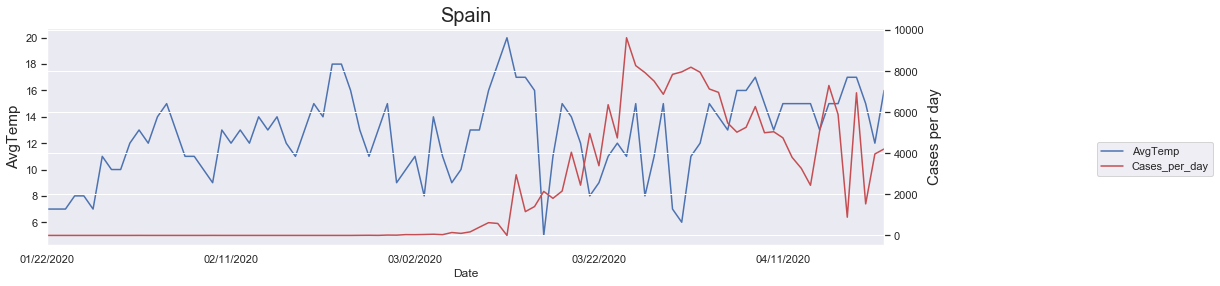

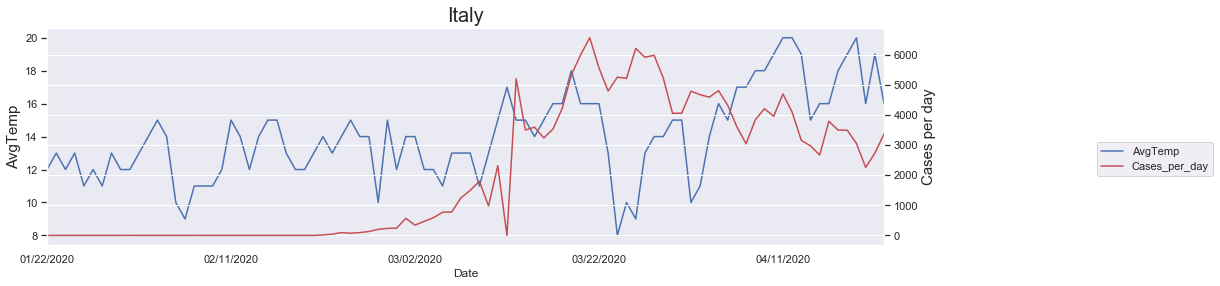

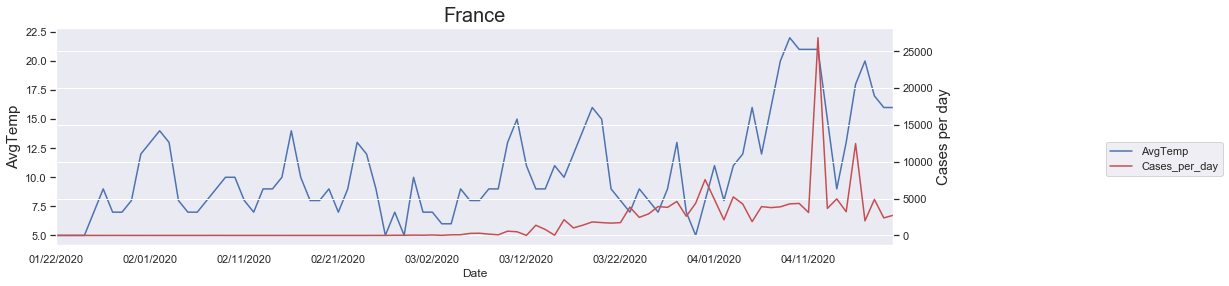

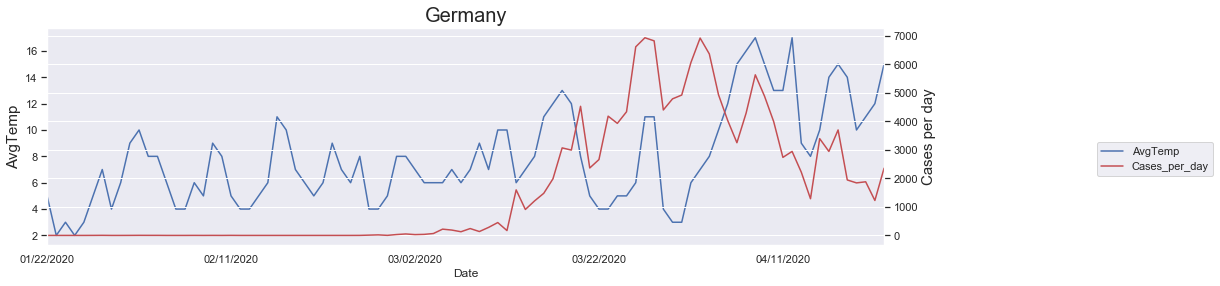

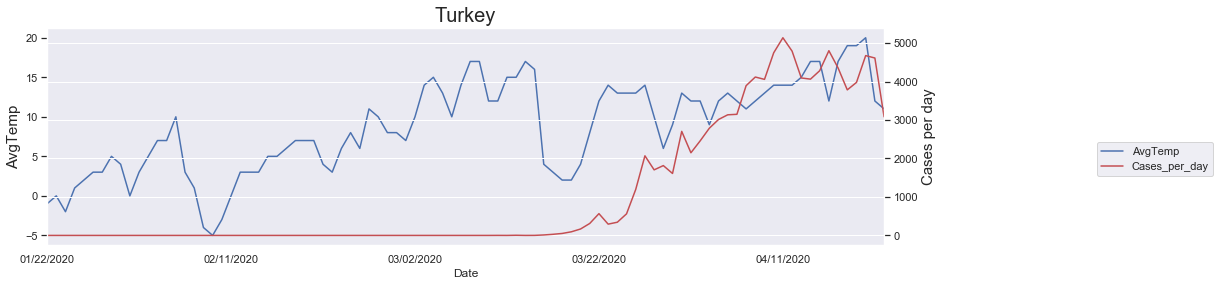

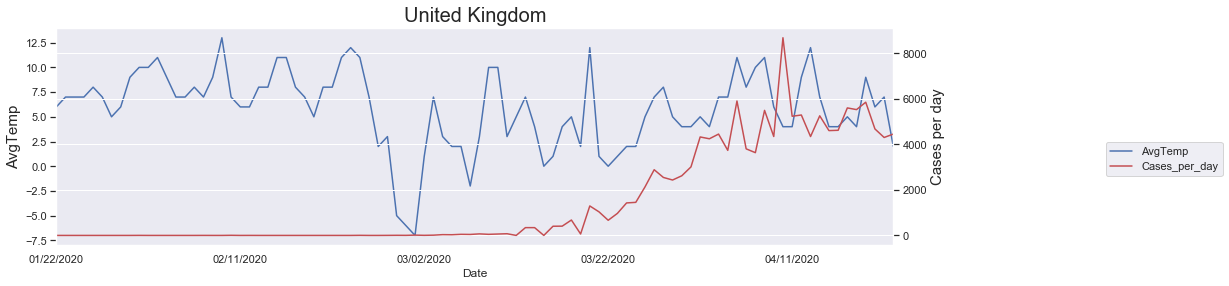

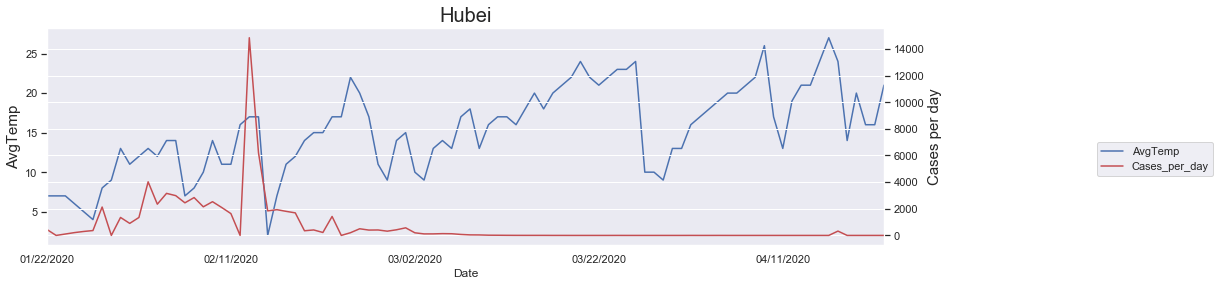

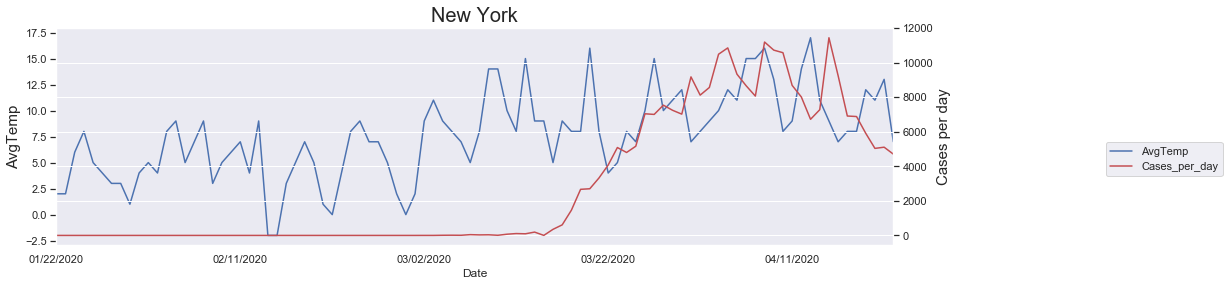

In [150]:
printmd('### <div align="center"> Average Temperature VS Cases Per Day </div>')
val = "AvgTemp"
for region in regions:
    data = temp_hum_cases_daily[temp_hum_cases_daily["Region"] == region]
#   plt.plot(data["Date"], data[numeric[1]])
    data = data.set_index("Date")
    df = data

    fig, ax = plt.subplots()
    data[val].plot(ax=ax, style='b-')
    # same ax as above since it's automatically added on the right
    data.Cases_per_day.plot(ax=ax, style='r-', secondary_y=True)

    ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
               [val,'Cases_per_day'], bbox_to_anchor=(1.4, 0.5))
    ax.set_ylabel(val, fontsize=15)
    ax.right_ax.set_ylabel('Cases per day', fontsize=15)
    ax.set_title(region, fontsize=20)


### Data Summary - Temperature

Based on the graphs above, we identify a clear relationship between average temperature and confirmed cases for Turkey, United Kingdom and New York. In these 3 regions, the number of cases seem to be positively correlated with the average temperature. We will test this assumption using regressions (for all regions).

### <div align="center"> Humidity VS Cases Per Day </div>

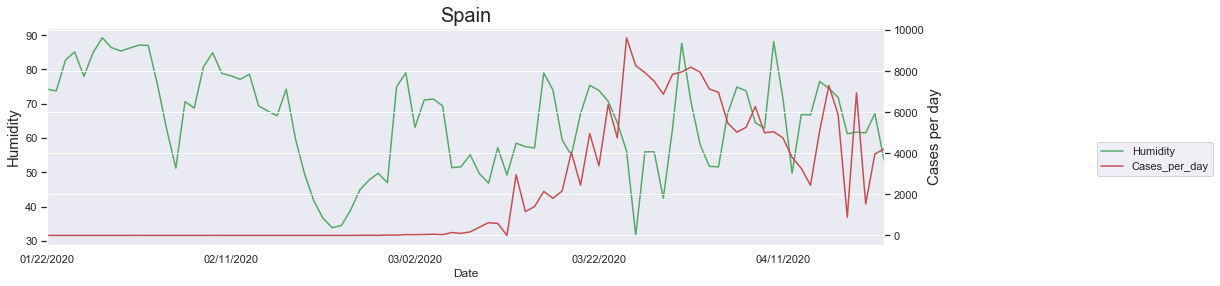

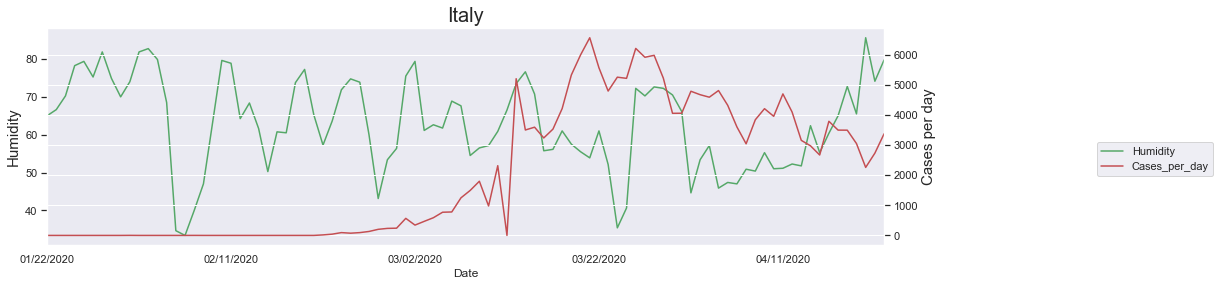

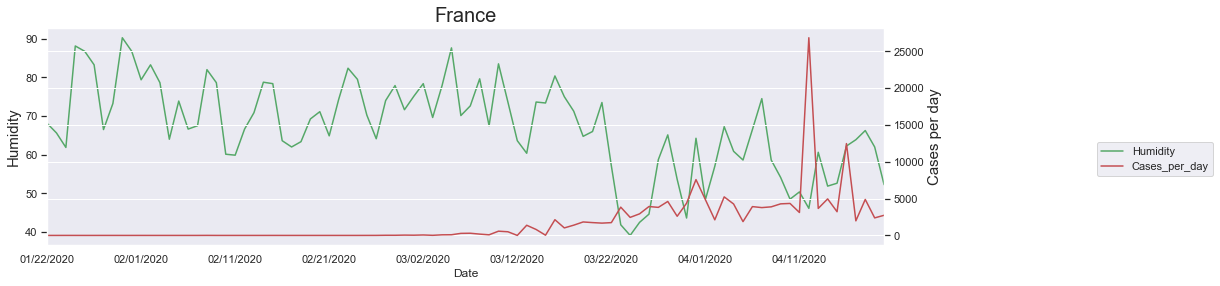

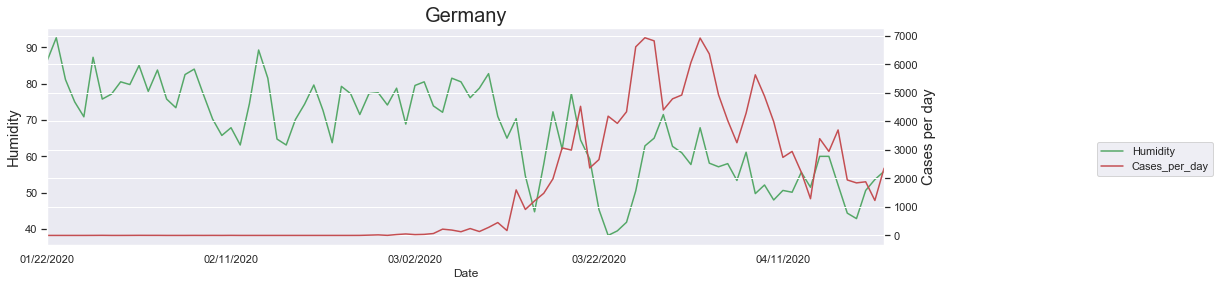

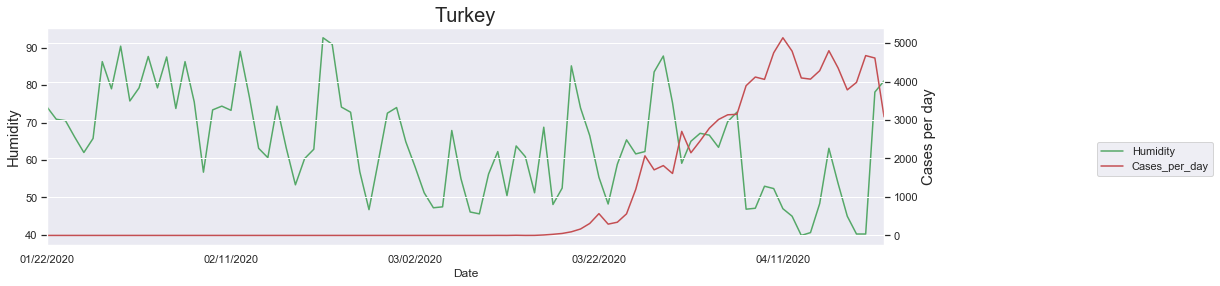

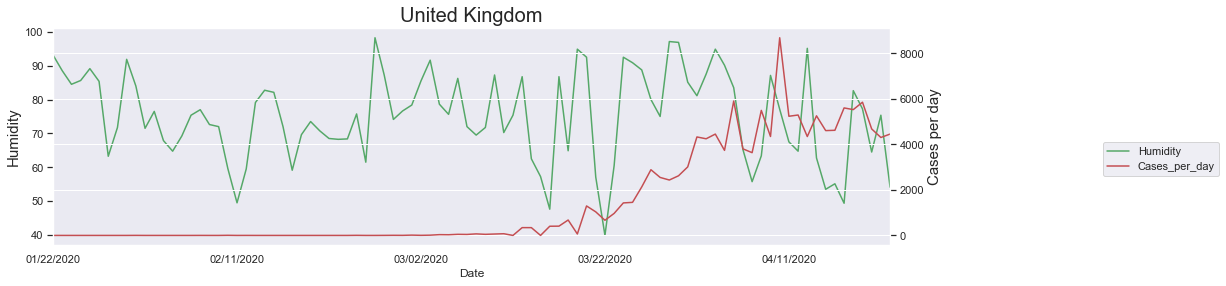

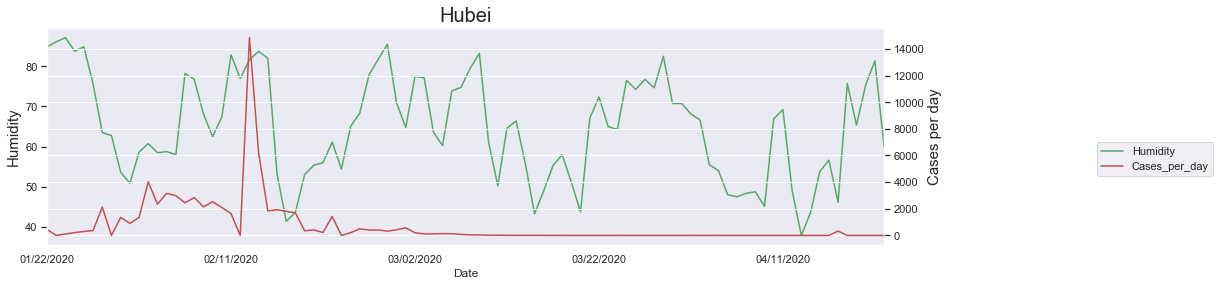

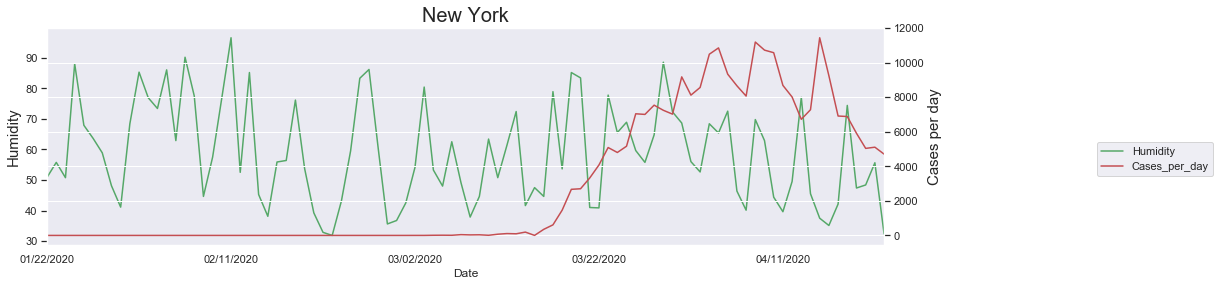

In [149]:
printmd('### <div align="center"> Humidity VS Cases Per Day </div>')
val = "Humidity"
for region in regions:
    data = temp_hum_cases_daily[temp_hum_cases_daily["Region"] == region]
#   plt.plot(data["Date"], data[numeric[1]])
    data = data.set_index("Date")
    df = data

    fig, ax = plt.subplots()
    data[val].plot(ax=ax, style='g-')
    # same ax as above since it's automatically added on the right
    data.Cases_per_day.plot(ax=ax, style='r-', secondary_y=True)

    ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]],\
               [val,'Cases_per_day'], bbox_to_anchor=(1.4, 0.5))
    ax.set_ylabel(val, fontsize=15)
    ax.right_ax.set_ylabel('Cases per day', fontsize=15)
    ax.set_title(region, fontsize=20)


### Data Summary - Humidity

In terms of humidity, except for France and Hubei, all the regions under consideration seem to show a negative relationship between the humidity and new confirmed cases being reported.

# Hypothesis

Based on the visualizations representing the relationship between average temperature and humidity for the regions with the most confirmed cases of the virus, we hypothesize that humidity will have a significant negative effect on the number of new cases being reported. However, since only 3 regions (out of 8) seem to demosntrate a relationship between the cases and average temperature, we hypothesize that temperature does not have a significant effect on number of cases being reported. 

#### OLS Regression

First we run a simple OLS regression using "number of new cases" as the dependent variable and "avg temperature" and "humidity" as the independent variables. 

In [151]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

target = "Cases_per_day"
X = temp_hum_cases_daily.drop(columns=[target,"Date", "Cases", "Region"])
y = temp_hum_cases_daily[target]

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary());

                            OLS Regression Results                            
Dep. Variable:          Cases_per_day   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     27.06
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           4.59e-12
Time:                        19:31:13   Log-Likelihood:                -6809.1
No. Observations:                 734   AIC:                         1.362e+04
Df Residuals:                     731   BIC:                         1.364e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3293.9575    557.053      5.913      0.0

### Findings

Based on the OLS Regression results, we note that both - average temperature and humidity, have a significant effect on the number of new cases at the 5% level (since the p-value is less than 0.05). Therefore, an increase in average temperature by one degree celsius, or a decrease in humidity, leads to a significant increase in the number of cases.

#### Circling back to the hypothesis

Based on the hypothesis, our assumption regarding humidity's impact on the spread of the virus is validated. However, based on the results, average temperature also has a significant effect on the number of cases being reported, which invalidates a section of the hypothesis. 

However, an important concern relating to the statistical significance of our results is - ***Multicollinearity***

Multicollinearity undermines the statistical significance of an independent variable. While multicollinearity should not have a major impact on the model’s accuracy, it does affect the variance associated with the prediction, as well as, reducing the quality of the interpretation of the independent variables.

https://towardsdatascience.com/multicollinearity-why-is-it-a-problem-398b010b77ac

#### Pearson correlation coefficient

In order to tests for Multicollinearity, we utilize the pearson's correlation coefficient. It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

Correlation is said to be of "High Degree" only if the correlation is between (0.50 and 1) or (-0.50 and -1). 

https://www.statisticssolutions.com/pearsons-correlation-coefficient/

In [152]:
from scipy.stats import pearsonr

corr, _ = pearsonr(temp_hum_cases_daily["AvgTemp"], temp_hum_cases_daily["Humidity"])
corr



-0.26225726671758864

There is no multiple collinearity issue as the pearson correlation is |corr| < 0.85. Therefore, we can trust the statistical significance of our estimates. 




In order to further verify these results, we employ a random forest regression to test the importance of the independent variables on the number of confirmed cases. 

### Regression (Machine Learning)

## Random Forest Regression



In [153]:
temp_hum_cases_daily.sort_values(by="Date", ascending=True).head(10)

Date          Region  AvgTemp  Humidity  Cases  Cases_per_day
0    01/22/2020           Hubei        7    84.875    444            444
644  01/22/2020        New York        2    50.875      0              0
552  01/22/2020  United Kingdom        6    93.125      0              0
460  01/22/2020          Turkey       -1    74.125      0              0
276  01/22/2020          France        5    68.125      0              0
184  01/22/2020           Italy       12    65.000      0              0
92   01/22/2020           Spain        7    74.250      0              0
368  01/22/2020         Germany        5    86.250      0              0
553  01/23/2020  United Kingdom        7    88.500      0              0
93   01/23/2020           Spain        7    73.750      0              0

In [154]:

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor



In [155]:
# Scale numeric values (standardScaler)
# One hot Encode categorical variables 
# Fill Empty values (SimpleImputer)

def preprocess_features(df_train, numeric_features, categorical_features, drop_features, target):

    all_features = set(numeric_features + categorical_features + drop_features + [target])
    print(all_features)
    if set(df_train.columns) != all_features:
        print("Missing columns", set(df_train.columns) - all_features)
        print("Extra columns", all_features - set(df_train.columns))
        raise Exception("Columns do not match")
    
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])  
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),#'constant', fill_value='?')),
        ('onehot', OneHotEncoder(sparse=False, drop='first'))#handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])
    preprocessor.fit(df_train);

    ohe = preprocessor.named_transformers_['categorical'].named_steps['onehot']
    ohe_feature_names = list(ohe.get_feature_names(categorical_features))
    new_columns = numeric_features + ohe_feature_names

    X_train_enc = pd.DataFrame(preprocessor.transform(df_train), index=df_train.index, columns=new_columns)
    y_train = df_train[target]
    
    return X_train_enc, y_train

In [156]:
numeric_features = ["AvgTemp", "Humidity"] 
categorical_features = ["Region"]
drop_features = ["Date", "Cases_per_day", "Cases"]
target = "Cases_per_day"

df_train_enc, y_train = preprocess_features(temp_hum_cases_daily, 
        numeric_features,
        categorical_features, 
        drop_features,
        target)

{'AvgTemp', 'Humidity', 'Date', 'Region', 'Cases', 'Cases_per_day'}


In [157]:
# rf = RandomForestRegressor(n_estimators = 10)
# rf.fit(X_train_enc, y_train)

# rf_coefs = pd.DataFrame(data=rf.feature_importances_, index=X_train_enc.columns, columns=["Importance"])
# rf_coefs.abs().sort_values(by="Importance", ascending = False).head(5)



# Hyperparameter tuning using RandomizedSearchCV(Cross-Validation) for best results
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

rf_param_dist = {
              "n_estimators"     : scipy.stats.randint(low=5, high=15),
              "max_depth"        : scipy.stats.randint(low=5, high=10),
              "max_features"     : scipy.stats.randint(low=1, high=10)
             }

rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=123), rf_param_dist, return_train_score=True, verbose=1, n_iter=20, cv=3, random_state=123)
rf_search.fit(df_train_enc, y_train);

# Display Random Forest's Feature Importances
rf_search.best_estimator_.feature_importances_
rf_coefs = pd.DataFrame(data=rf_search.best_estimator_.feature_importances_, index=df_train_enc.columns, columns=["Importance"])
rf_coefs.sort_values(by="Importance", ascending = False).head(5)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.3s finished


Importance
AvgTemp            0.422054
Humidity           0.421641
Region_Hubei       0.061272
Region_New York    0.042197
Region_Turkey      0.022415

In [158]:

rf = RandomForestRegressor(n_estimators = 10)
rf.fit(df_train_enc, y_train)
rf.score(df_train_enc, y_train)



0.8182742538442688

***Feature importance*** is useful if we want to analyze which features are important for the overall random forest model.
Important features refer to the features that are more closely related with dependent variable and contribute more for variation of the dependent variable.



Based on the table above, we note that average temperature and humidity are "almost equally important" while predicting the additional number of confirmed cases per day. This also "indirectly" supports our OLS regression results. 

# Limitations & Further Research  

Our study has several limitation which might affect the accuracy of our results. There are several factors (which are not controlled for in our regressions) that might affect the spread of the virus, such as:
 
1) Days since lockdown

In China, the lockdown in Hubei was initiated on January 23, 2020 (most other regions in our dataset did not even have a single case of the virus at that time)

2) Intensity of lockdown

Is the country using recommendations for social distancing or implementing lockdowns?

3) Population density before lockdown

Countries like India and China might have had more cases solely because of their high population density which makes it harder for people to practice social distancing

4) Literacy rate

Whether people actually follow the government's recommendations?


Absence of these controls could plague our study with ***Omitted variable bias***. Hence, for further research we would be closely monitoring these variables as well to improve the accuracy of our results. 